###code source
https://blog.csdn.net/clayanddev/article/details/53955544


In [0]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

class NNModel:
    Ws = [] # params W of the whole network
    bs = [] # params b of the whole network
    layers = [] # number of nodes in each layer
    epsilon = 0.01 # default learning rate for gradient descent


    def __init__(self, layers, epsilon):
        self.layers = layers
        self.epsilon = epsilon
        self.init_params()

    # Initialize the parameters (W and b) to random values. We need to learn these.
    def init_params(self):
        np.random.seed(0)
        layers = self.layers
        hidden_layer_num = len(layers) - 1
        Ws = [1] * hidden_layer_num
        bs = [1] * hidden_layer_num
        for i in range(0, hidden_layer_num):
            Ws[i] = np.random.randn(layers[i], layers[i + 1]) / np.sqrt(layers[i]) *0.01
            bs[i] = np.zeros((1, layers[i + 1]))
        self.Ws = Ws
        self.bs = bs

    # This function learns parameters for the neural network from training dataset
    # - num_passes: Number of passes through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations
    def train(self, X, y, num_passes=20000, keep_prob = 1, beta = 0, print_loss=False):
        num_examples = len(X)
        expected_output = y
        
        losses = []
        accuracys = []

        # Gradient descent. For each batch...
        for i in range(1, num_passes+1):

            # Forward propagation
            a_output = self.forward(X, keep_prob)

            # Backpropagation
            v_dWs, v_dbs = self.backward(X, expected_output, a_output, keep_prob, beta)

            # Update parameters of the model
            self.update_model_params(v_dWs, v_dbs, num_examples)
            
            #record cost
            loss = self.calculate_loss(X, expected_output, keep_prob)
            
            losses.append(loss)
            
            accuracy = 1-(np.count_nonzero(model.predict(X) - labels_train))/len(X)
            
            accuracys.append(accuracy)

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 100 == 0:
                print("Loss after iteration %i: %f" % (i, loss))
                
        return losses, accuracys

    # Helper function to evaluate the total loss on the dataset
    def calculate_loss(self, X, expected_output, keep_prob):
        num_examples = len(X)  # training set size

        # Forward propagation to calculate our predictions
        a_output = self.forward(X, keep_prob)
        probs = a_output[-1]

        # Calculating the loss
        corect_logprobs = -np.log(probs[range(num_examples), expected_output])
        data_loss = np.sum(corect_logprobs)
        # Add regulatization term to loss (optional)
 
        return 1. / num_examples * data_loss

    # Forward propagation
    def forward(self, X, keep_prob):
        Ws = self.Ws
        bs = self.bs
        hidden_layer_num = len(Ws)
        a_output = [1] * hidden_layer_num
        current_input = X

        for i in range(0, hidden_layer_num - 1):
            w_current = Ws[i]
            b_current = bs[i]
            z_current = current_input.dot(w_current) + b_current
            a_current = relu(z_current)
            
            d = np.random.rand(a_current.shape[0],a_current.shape[1]) < keep_prob
            
            a_current = np.multiply(d, a_current)
            
            a_current /= keep_prob
            
            a_output[i] = a_current
            current_input = a_current
            
        keep_prob = 1

        #output layer(softmax)
        z_current = current_input.dot(Ws[hidden_layer_num - 1]) + bs[hidden_layer_num - 1]
        a_current = softmax(z_current)
        a_output[hidden_layer_num - 1] = a_current
        return a_output

    # Predict the result of classification of input x
    def predict(self, x):
        a_output = self.forward(x, keep_prob = 1)
        return np.argmax(a_output[-1], axis=1)

    # Backpropagation
    def backward(self, X, expected_output, a_output, keep_prob, beta):
        Ws = self.Ws
        bs = self.bs
        hidden_layer_num = len(Ws)
        
        num_examples = len(X)
        ds = [1] * hidden_layer_num
        
        #print('ds', ds)

        # output layer
        d_current = a_output[hidden_layer_num - 1]
        
        #print('d_current', d_current)

        d_current[range(num_examples), expected_output] -= 1
        
        #print('d_current', d_current)

        ds[hidden_layer_num - 1] = d_current
        
        #print('ds', ds)

        #other hidden layer
        for l in range(hidden_layer_num - 2, -1, -1):
            w_current = Ws[l + 1]
            a_current = a_output[l]
            d_current = np.dot(d_current, w_current.T) * (relu_deriv(a_current))
            ds[l] = d_current / keep_prob

        #calc dW && db
        dWs = [1] * hidden_layer_num
        dbs = [1] * hidden_layer_num
        
        v_dWs = [0] * hidden_layer_num
        v_dbs = [0] * hidden_layer_num
        
        
        a_last = X
        num_output = len(X)
        for l in range(0, hidden_layer_num):
            d_current = ds[l]
            dWs[l] = np.dot(a_last.T, d_current)
            dbs[l] = np.sum(d_current, axis=0, keepdims=True)
            
            v_dWs[l] = beta * v_dWs[l] + (1-beta) * dWs[l]
            v_dbs[l] = beta * v_dbs[l] + (1-beta) * dbs[l]
            
            a_last = a_output[l]
        return v_dWs, v_dbs

    # Update the params (Ws and bs) of the netword during Backpropagation
    def update_model_params(self, v_dWs, v_dbs, num_examples):
        Ws = self.Ws
        bs = self.bs
        hidden_layer_num = len(Ws)
        for l in range(0, hidden_layer_num):
            Ws[l] = Ws[l] - self.epsilon * (v_dWs[l])/ num_examples
            bs[l] = bs[l] - self.epsilon * (v_dbs[l])/ num_examples

        self.Ws = Ws
        self.bs = bs

def softmax(x):
    exp_scores = np.exp(x)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

def tanh(x):
    return np.tanh(x)
  
def tanh_deriv(a):
    return 1-a**2
  
def relu(x):       
    return np.maximum(0,x)
  
def relu_deriv(a):
    a[a>0]=1
    a[a<=0]=0
    return a  


###import data

In [0]:
X_predict = X[-10000:]
labels_predict= labels[-10000:]

In [0]:
X_train = X[:1000]
labels_train = labels[:1000]

##current optimal config for tanh 50000

In [0]:
class Config:
    # Gradient descent parameters (I picked these by hand)
    epsilon = 0.1  # learning rate for gradient descent
    layers = [128,20,40,10] # number of nodes in each layer


## current optimal config for relu 50000

In [0]:
class Config:
    # Gradient descent parameters (I picked these by hand)
    epsilon = 0.075  # learning rate for gradient descent
    layers = [128,20,40,10] # number of nodes in each layer

In [0]:
def plot_train(losses_train, accuracys_train):
    plt.plot(losses_train)
    plt.plot(accuracys_train)

## main train process

In [57]:
import time
start_time = time.time()
model = NNModel(Config.layers, Config.epsilon)
losses_train, accuracys_train = model.train(X_train, labels_train, num_passes=200, keep_prob = .8, beta = 0.8, print_loss=True)
print("--- %s seconds ---" % (time.time() - start_time))

plot_train(losses_train, accuracys_train)


Loss after iteration 100: 1.500125
Loss after iteration 200: 1.272897
--- 10.682698011398315 seconds ---


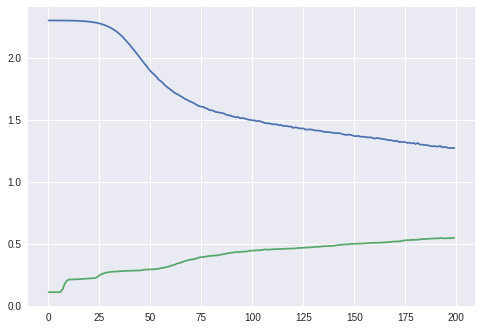

In [59]:
plot_train(losses_train, accuracys_train)

### accuracy 

train accuracy

In [61]:
1-(np.count_nonzero(model.predict(X_train) - labels_train))/len(X_train)

0.5498000000000001

test accuracy

In [60]:
1-(np.count_nonzero(model.predict(X_predict) - labels_predict))/len(X_predict)

0.5375

## check the impact of beta in sgd momentum

##check the impact of keep_prob

In [0]:
keep_probs = np.linspace(0.1, 1, 19, endpoint=True)

In [74]:
losses_prob = []
accuracys_pred_prob= []
for k in keep_probs:
    
    model = NNModel(Config.layers, Config.epsilon)
    
    losses_train, accuracys_train = model.train(X_train, labels_train, num_passes=5000, keep_prob =k, beta = 0.8, print_loss=False)
    
    print("Train_Loss for keep_prob = %f: %f" % (k, losses_train[-1]))
    
    losses_prob.append(losses_train[-1])
    
    accuracys = 1- (np.count_nonzero(model.predict(X_predict) - labels_predict))/len(X_predict)
    
    print("Predict_accuracy for keep_prob = %f: %f" % (k, accuracys))
    
    accuracys_pred_prob.append(accuracys)
    
    
    
    

Train_Loss for keep_prob = 0.100000: 2.005353
Predict_accuracy for keep_prob = 0.100000: 0.196900
Train_Loss for keep_prob = 0.150000: 1.807452
Predict_accuracy for keep_prob = 0.150000: 0.316600
Train_Loss for keep_prob = 0.200000: 1.680609
Predict_accuracy for keep_prob = 0.200000: 0.460800
Train_Loss for keep_prob = 0.250000: 1.573054
Predict_accuracy for keep_prob = 0.250000: 0.436500
Train_Loss for keep_prob = 0.300000: 1.466566
Predict_accuracy for keep_prob = 0.300000: 0.463900
Train_Loss for keep_prob = 0.350000: 1.343462
Predict_accuracy for keep_prob = 0.350000: 0.580800
Train_Loss for keep_prob = 0.400000: 1.269820
Predict_accuracy for keep_prob = 0.400000: 0.632200
Train_Loss for keep_prob = 0.450000: 1.174522
Predict_accuracy for keep_prob = 0.450000: 0.662900
Train_Loss for keep_prob = 0.500000: 1.098272
Predict_accuracy for keep_prob = 0.500000: 0.674000
Train_Loss for keep_prob = 0.550000: 1.018894
Predict_accuracy for keep_prob = 0.550000: 0.685200
Train_Loss for keep_

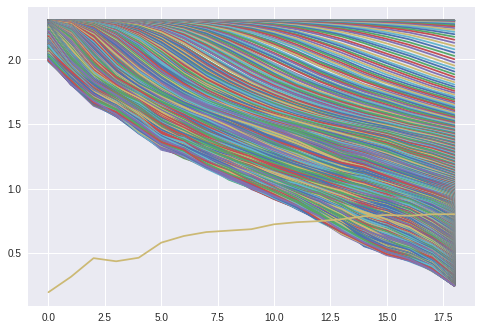

In [75]:

plt.plot(losses_prob)
plt.plot(accuracys_pred_prob)

### upload from google drive

In [0]:
# Install a Drive FUSE wrapper.

# https://github.com/astrada/google-drive-ocamlfuse

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

In [0]:
# Generate auth tokens for Colab

from google.colab import auth 
auth.authenticate_user()

In [10]:
# Generate creds for the Drive FUSE library.

from oauth2client.client import GoogleCredentials 
creds = GoogleCredentials.get_application_default()

import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.

!mkdir -p drive

!google-drive-ocamlfuse drive

In [0]:
with h5py.File('drive/Colab Notebooks/deep_data_ass_1/train_128.h5','r') as H:
    X = np.copy(H['data'])

with h5py.File('drive/Colab Notebooks/deep_data_ass_1/train_label.h5','r') as H:
    labels = np.copy(H['label'])
